# Genetic drift

Natural selection can push allele frequencies around,
but what if it isn't?
Allele frequencies still change, due to the randomness inherent in who reproduces
and who doesn't.
Or, what if natural selection is acting -- how important is the randomness?

## The simplest model

As usual, let's start simple.
Suppose in a population of size $N$ an allele is at frequency $p = k/N$.
On average, we'd expect it to *still* be at frequency $p$ in the next generation.
Let's see how that works out.

In [1]:
%load_ext slim_magic

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, SVG

In [2]:
%%slim_stats_reps_cstack 30 --out drift
// set up a single locus simulation of drift
initialize()
{
    initializeMutationRate(0);
    initializeMutationType("m1", 0.5, "f", 0.0);
    initializeGenomicElementType("g1", c(m1), c(1.0));
    initializeGenomicElement(g1, 0, 0);
    initializeRecombinationRate(0);
    suppressWarnings(T);
}

1 {
    sim.addSubpop("p1", 500);
    // add mutation to half the genomes from the first population
    target = sample(p1.genomes, p1.individualCount);
    target.addNewMutation(m1,0, 0);
    log = sim.createLogFile("/dev/stdout", logInterval=1);
    log.addGeneration();
    log.addCustomColumn("p", "mean(p1.individuals.countOfMutationsOfType(m1))/2;");
}

300 late() {
    sim.simulationFinished();
}

In [3]:
drift

,p,p,p,p,p,p,p,p,p,p,...,p,p,p,p,p,p,p,p,p,p
generation,,,,,,,,,,,,,,,,,,,,,
1,0.499,0.509,0.509,0.482,0.508,0.491,0.489,0.502,0.499,0.495,...,0.486,0.472,0.499,0.523,0.514,0.491,0.502,0.510,0.489,0.502
2,0.514,0.508,0.499,0.501,0.537,0.494,0.477,0.489,0.472,0.513,...,0.497,0.478,0.519,0.488,0.519,0.491,0.499,0.498,0.507,0.509
3,0.526,0.519,0.492,0.481,0.557,0.497,0.489,0.493,0.482,0.501,...,0.499,0.495,0.527,0.478,0.502,0.512,0.499,0.512,0.498,0.515
4,0.507,0.552,0.486,0.450,0.528,0.483,0.481,0.497,0.476,0.495,...,0.500,0.510,0.497,0.477,0.513,0.516,0.489,0.508,0.496,0.525
5,0.529,0.537,0.530,0.443,0.526,0.480,0.477,0.487,0.487,0.497,...,0.499,0.492,0.492,0.461,0.504,0.505,0.524,0.513,0.524,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.193,0.342,0.825,0.404,0.000,0.847,0.088,0.374,0.273,0.376,...,0.743,0.608,0.479,0.104,0.459,0.367,0.437,0.298,0.389,0.240
297,0.199,0.328,0.821,0.404,0.000,0.829,0.077,0.367,0.275,0.368,...,0.741,0.591,0.481,0.107,0.442,0.393,0.416,0.318,0.409,0.238
298,0.197,0.330,0.831,0.393,0.000,0.820,0.064,0.388,0.279,0.359,...,0.744,0.604,0.456,0.095,0.456,0.407,0.423,0.292,0.426,0.236


Here's those allele frequencies through time:

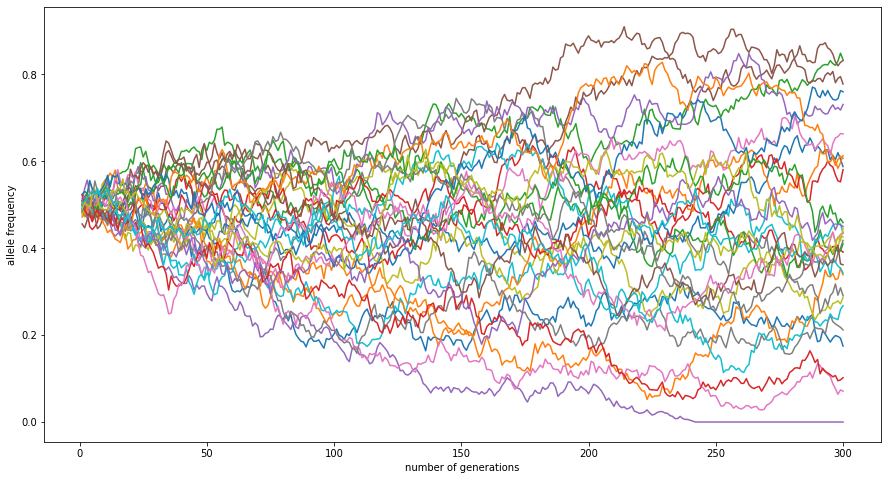

In [4]:
drift.set_axis([f"p{k}" for k in range(drift.shape[1])], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("number of generations")
ax.set_ylabel("allele frequency")
for col in drift:
    ax.plot(drift.index, drift[col])

And, here's the standard deviation of those allele frequences through time:

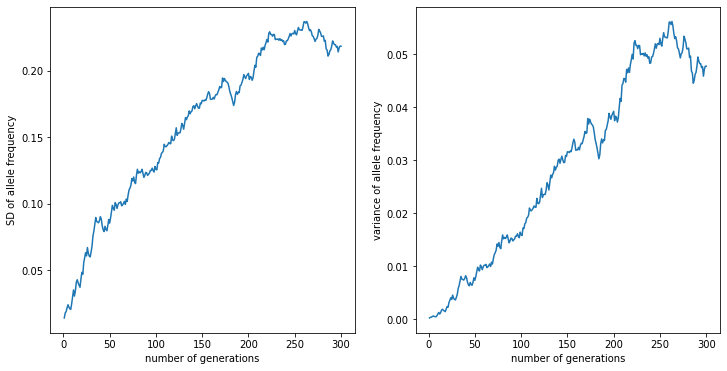

In [5]:
p = np.array(drift)
sds = np.array([
    np.std(x) for x in p
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(drift.index, sds)
ax1.set_xlabel("number of generations")
ax1.set_ylabel("SD of allele frequency")
ax2.plot(drift.index, sds**2)
ax2.set_xlabel("number of generations")
ax2.set_ylabel("variance of allele frequency");